In [1]:
# importing all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cwd = os.getcwd()
ratings = pd.read_csv(os.path.join(cwd,'ml-latest-small','ratings.csv'))
ratings.drop('timestamp', axis=1, inplace=True)
print(ratings.shape)
ratings.head()

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


<h1>Sparcity Check</h1>

In [3]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
print('number of users: {}\nnumber of movies: {}'.format(n_users, n_movies))

number of users: 610
number of movies: 9724


In [4]:
print('sparsity level is {}%'.format(round((1.0 - len(ratings)/float(n_users*n_movies))*100, 4)))

sparsity level is 98.3%


<h1>Summarize by movie</h1>

In [5]:
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
print(movie_summary.shape)
movie_summary.head()


(9724, 1)


,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [6]:
movie_summary['num_ratings'] =ratings.groupby('movieId')['rating'].count()
print(movie_summary['num_ratings'].max())
print(movie_summary['num_ratings'].min())
movie_summary.head()

329
1


,rating,num_ratings
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


<h1>Rating Frequency</h1>


In [7]:
movie_summary['num_ratings'].describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: num_ratings, dtype: float64

<AxesSubplot:>

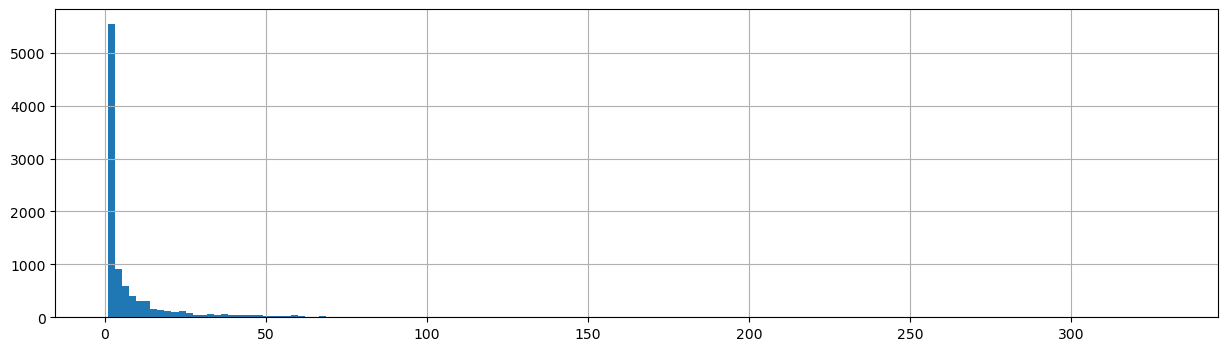

In [8]:
plt.figure(figsize=(15,4))
movie_summary['num_ratings'].hist(bins=150)


<AxesSubplot:>

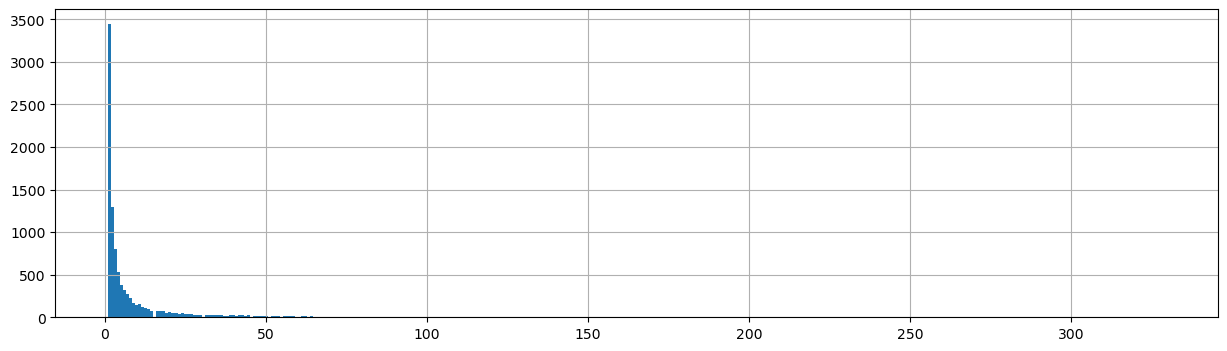

In [9]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 500]['num_ratings'].hist(bins=350)

<AxesSubplot:>

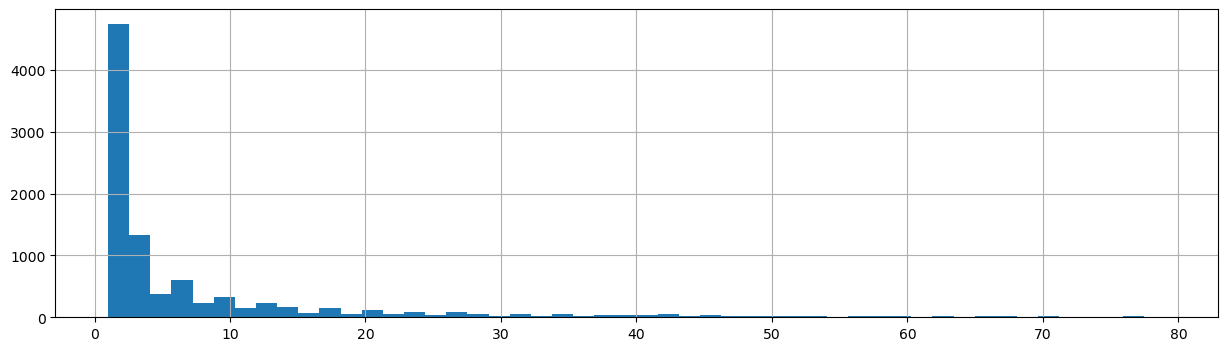

In [10]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 80]['num_ratings'].hist(bins=50)

In [11]:
(movie_summary['num_ratings'] < 5).sum()

6074

<AxesSubplot:>

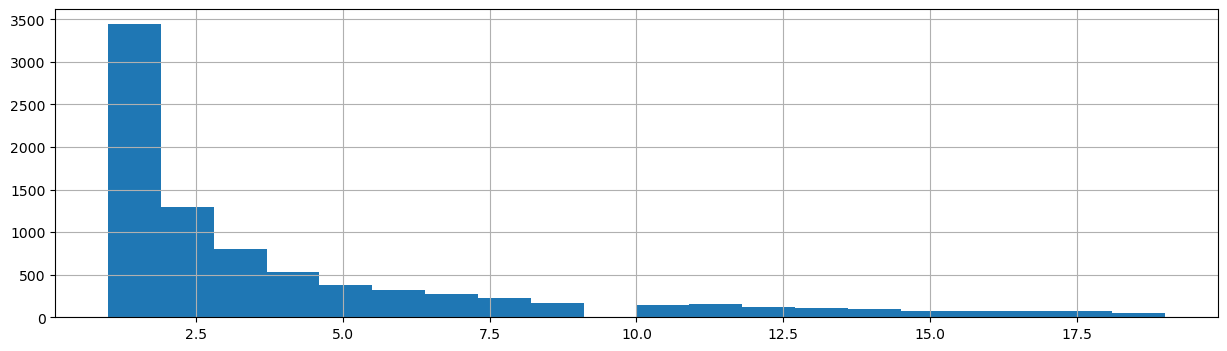

In [12]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 20]['num_ratings'].hist(bins=20)

In [13]:
# number of movies with the 1 and 0 rating
print(movie_summary[movie_summary['num_ratings']==1]['num_ratings'].count())
print(movie_summary[movie_summary['num_ratings']==0]['num_ratings'].count())

3446
0


<AxesSubplot:>

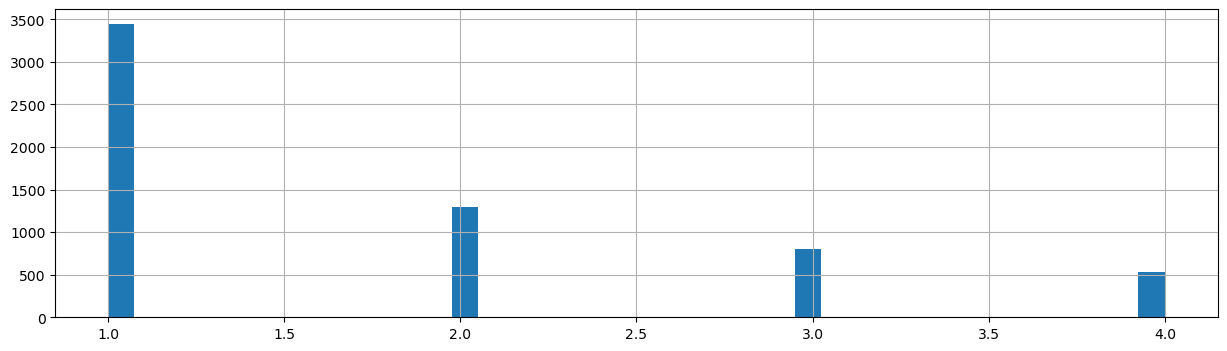

In [14]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 5]['num_ratings'].hist(bins=40)

<h1>Rating value</h1>

<AxesSubplot:>

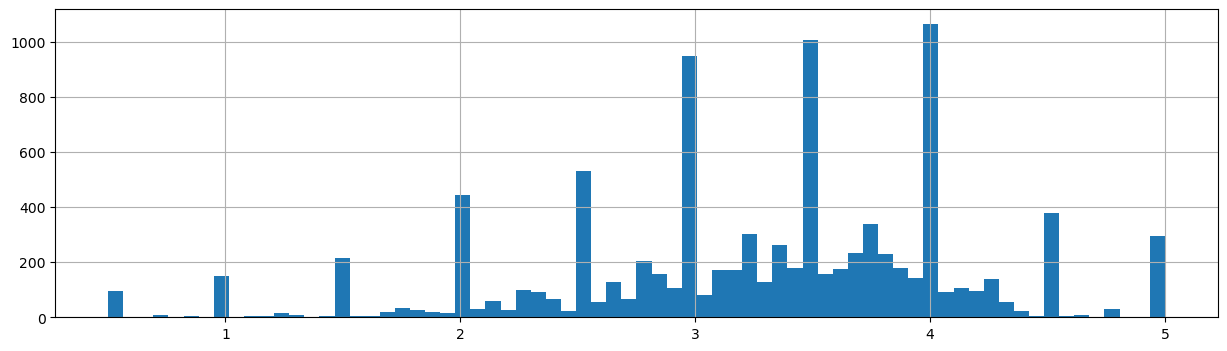

In [15]:
plt.figure(figsize=(15,4))
movie_summary['rating'].hist(bins=70)

<h1>Interaction between ratings and rating frequency</h1>

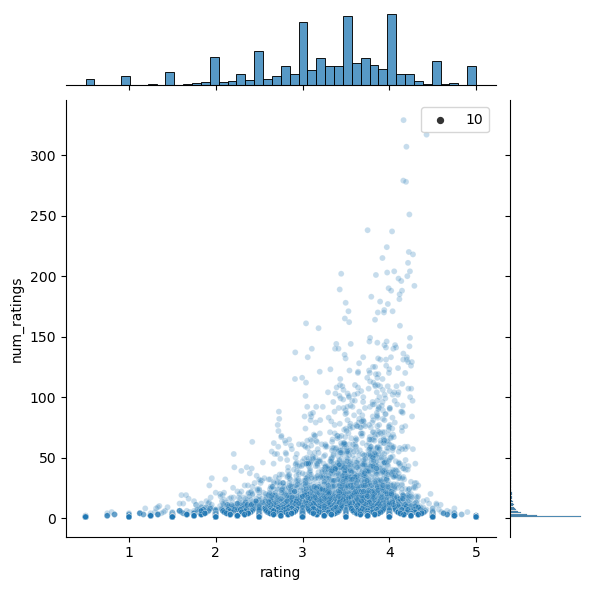

In [16]:
sns.jointplot(x='rating',y='num_ratings',data=movie_summary,alpha=0.25, size=10)

<h1>Summarize by user</h1>

In [17]:
user_summary = pd.DataFrame(ratings.groupby('userId')['rating'].count())
user_summary.head()

,rating
userId,
1,232
2,29
3,39
4,216
5,44


In [18]:
user_summary.columns = ['rating_freq']
user_summary.head()

,rating_freq
userId,
1,232
2,29
3,39
4,216
5,44


In [19]:
user_summary['rating_mean'] = ratings.groupby('userId')['rating'].mean()

In [20]:
user_summary.head()

,rating_freq,rating_mean
userId,,
1,232,4.366379
2,29,3.948276
3,39,2.435897
4,216,3.555556
5,44,3.636364


In [21]:
user_summary.describe()

,rating_freq,rating_mean
count,610.000000,610.000000
mean,165.304918,3.657222
std,269.480584,0.480635
min,20.000000,1.275000
25%,35.000000,3.360000
50%,70.500000,3.694385
75%,168.000000,3.997500
max,2698.000000,5.000000


<AxesSubplot:>

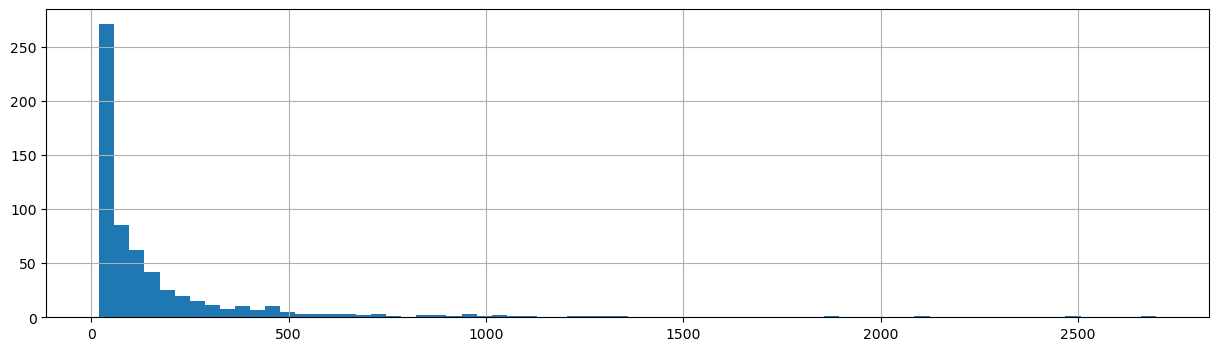

In [22]:
plt.figure(figsize=(15,4))
user_summary['rating_freq'].hist(bins=70)


<AxesSubplot:>

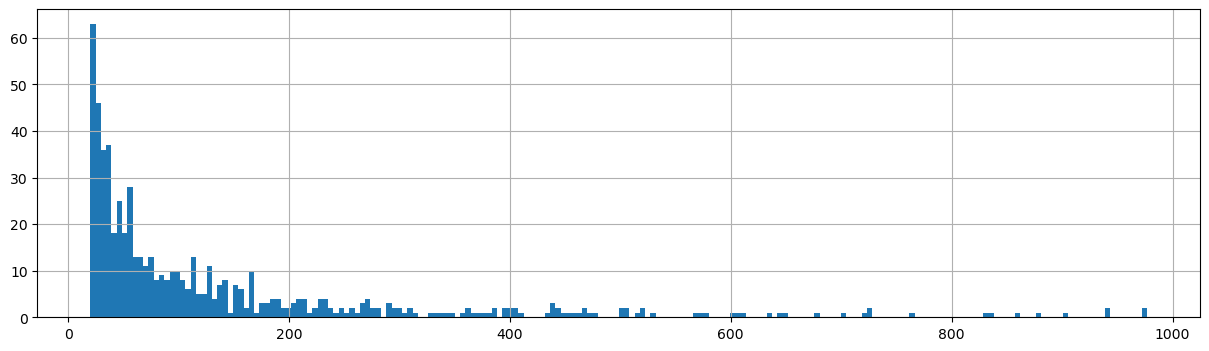

In [23]:
plt.figure(figsize=(15,4))
user_summary[user_summary['rating_freq'] < 1000]['rating_freq'].hist(bins=200)

<AxesSubplot:>

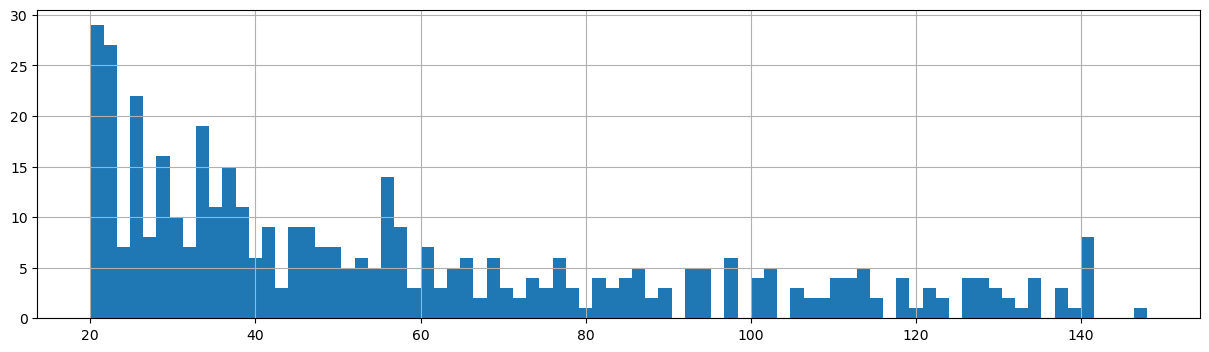

In [24]:
plt.figure(figsize=(15,4))
user_summary[user_summary['rating_freq']<150]['rating_freq'].hist(bins=80)

<AxesSubplot:>

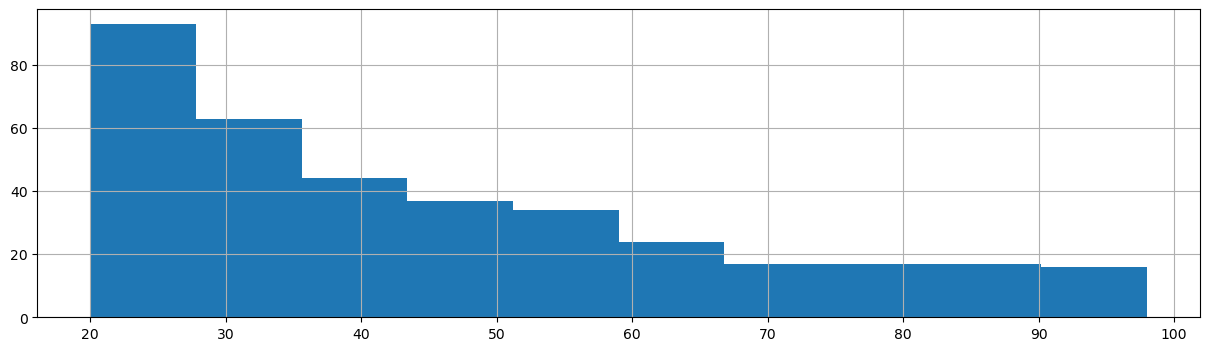

In [25]:
plt.figure(figsize=(15,4))
user_summary[user_summary['rating_freq']<100]['rating_freq'].hist(bins=10)

<h1>Rating value</h1>

<AxesSubplot:>

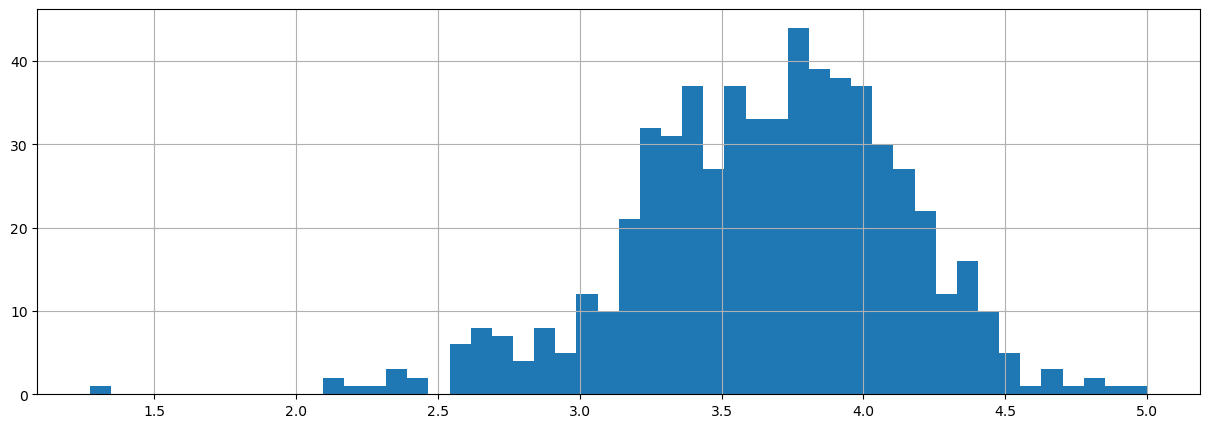

In [26]:
plt.figure(figsize=(15,5))
user_summary['rating_mean'].hist(bins=50)

<h1>Interaction between ratings and rating frequency</h1>

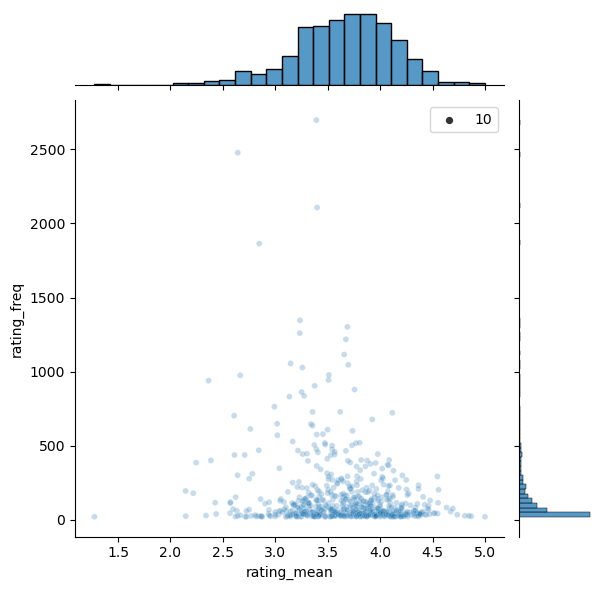

In [27]:
sns.jointplot(x='rating_mean',y='rating_freq',data=user_summary,alpha=0.25, size=10)